Praktikum Machine Learning: Klasifikasi Data (Dataset Wine)

# Langkah 1: Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Langkah 2: Load Dataset**

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

print("Jumlah data:", X.shape[0])
print("Jumlah fitur:", X.shape[1])
print("Nama kelas:", wine.target_names)


Jumlah data: 178
Jumlah fitur: 13
Nama kelas: ['class_0' 'class_1' 'class_2']


# Langkah 3: Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Langkah 4: Normalisasi Data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Langkah 5: Logistic Regression**

In [ ]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


# Langkah 6: K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


# Langkah 7: Decision Tree

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)


# Langkah 8: Support Vector Machine (SVM)

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


# Langkah 9: Bandingkan Model (Dengan Grafik)

Logistic Regression: 0.972
KNN: 0.972
Decision Tree: 0.944
SVM: 0.944


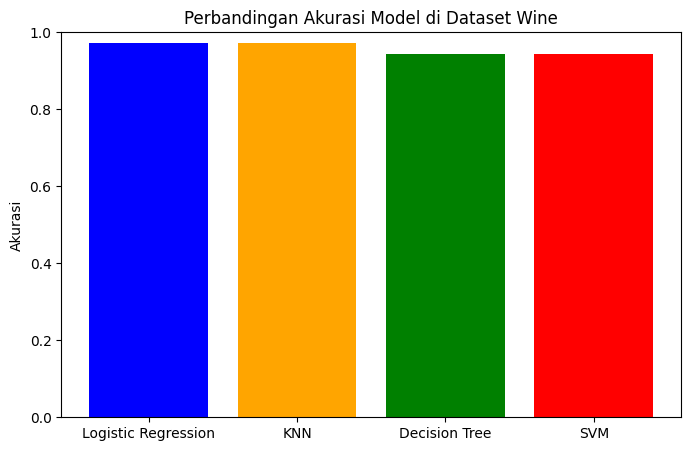

In [ ]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_logreg),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Decision Tree": accuracy_score(y_test, y_pred_tree),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

# Cetak hasil akurasi
for model, acc in results.items():
    print(f"{model}: {acc:.3f}")

# Visualisasi grafik
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['blue','orange','green','red'])
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Model di Dataset Wine")
plt.ylim(0,1)
plt.show()
